## 6.01 - Supervised Learning Model Comparison

Recall the "data science process."

1. Define the problem.
2. Gather the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [1]:
import pandas as pd
import numpy as np

In [2]:
four01k = pd.read_csv('401ksubs.csv')

##### 2. What are 2-3 other variables that, if available, would be helpful to have?

- education level
- empolyment status
- number of kids

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

This might be seen as discriminating intention. Race should not be a determining factor for targeting audience.

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

- incsq
- agesq

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

- incsq
- agesq

In [3]:
four01k

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809
...,...,...,...,...,...,...,...,...,...,...,...
9270,0,58.428,1,0,33,4,-1.200,0,0,3413.8310,1089
9271,0,24.546,0,1,37,3,2.000,0,0,602.5061,1369
9272,0,38.550,1,0,33,3,-13.600,0,1,1486.1020,1089
9273,0,34.410,1,0,57,3,3.550,0,0,1184.0480,3249


##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

- inc variable is describe as income squared: value should be in $1000 representation
- age variable is describe as age squared: the values seems to indicate that it should be just age and not squared

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

- Linear Regression: Easy to interpret
- Logistic Regression: Not as useful, as it is use for predicting 0 and 1
- Polynomial Regression: fit nonlinear models to its data
- Ridge Regression: will be benefit if there is a high error due to its variance
- Lasso Regression: more effective with narrowing down lots of variables

Linear or ridge will be more suitable for predicting income

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector regressor
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn import metrics
from math import sqrt

In [5]:
features = ['marr','male','age','fsize','nettfa','incsq','agesq']

X = four01k[features]
y = four01k['inc']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [26]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
lr_train_score = lr.score(X_train_sc, y_train)
lr_test_score = lr.score(X_test_sc, y_test)
lr_cv_score = cross_val_score(lr, X_train_sc, y_train, cv=5).mean()
print(f"Train score: {lr_train_score}")
print(f"Test score: {lr_test_score}")
print(f"CV score: {lr_cv_score}")

Train score: 0.8948254673897011
Test score: 0.9055024120733454
CV score: 0.8934438475524992


In [27]:
knnr = KNeighborsRegressor()
knnr.fit(X_train_sc, y_train)
knnr_train_score = knnr.score(X_train_sc, y_train)
knnr_test_score = knnr.score(X_test_sc, y_test)
knnr_cv_score = cross_val_score(knnr, X_train_sc, y_train, cv=5).mean()
print(f"Train score: {knnr_train_score}")
print(f"Test score: {knnr_test_score}")
print(f"CV score: {knnr_cv_score}")

Train score: 0.9795704183969427
Test score: 0.9728418554699854
CV score: 0.9623823509317297


In [28]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_sc, y_train)
dtr_train_score = dtr.score(X_train_sc, y_train)
dtr_test_score = dtr.score(X_test_sc, y_test)
dtr_cv_score = cross_val_score(dtr, X_train_sc, y_train, cv=5).mean()
print(f"Train score: {dtr_train_score}")
print(f"Test score: {dtr_test_score}")
print(f"CV score: {dtr_cv_score}")

Train score: 1.0
Test score: 0.9999909563973628
CV score: 0.9998272867504279


In [29]:
bagr = BaggingRegressor()
bagr.fit(X_train_sc, y_train)
bagr_train_score = bagr.score(X_train_sc, y_train)
bagr_test_score = bagr.score(X_test_sc, y_test)
bagr_cv_score = cross_val_score(bagr, X_train_sc, y_train, cv=5).mean()
print(f"Train score: {bagr_train_score}")
print(f"Test score: {bagr_test_score}")
print(f"CV score: {bagr_cv_score}")

Train score: 0.9999757732345468
Test score: 0.9999631663709371
CV score: 0.9999055466797975


In [30]:
rfr = RandomForestRegressor()
rfr.fit(X_train_sc, y_train)
rfr_train_score = rfr.score(X_train_sc, y_train)
rfr_test_score = rfr.score(X_test_sc, y_test)
rfr_cv_score = cross_val_score(rfr, X_train_sc, y_train, cv=5).mean()
print(f"Train score: {rfr_train_score}")
print(f"Test score: {rfr_test_score}")
print(f"CV score: {rfr_cv_score}")

Train score: 0.9999898735621409
Test score: 0.9999898936278704
CV score: 0.9999308283139303


In [31]:
adar = AdaBoostRegressor()
adar.fit(X_train_sc, y_train)
adar_train_score = adar.score(X_train_sc, y_train)
adar_test_score = adar.score(X_test_sc, y_test)
adar_cv_score = cross_val_score(adar, X_train_sc, y_train, cv=5).mean()
print(f"Train score: {adar_train_score}")
print(f"Test score: {adar_test_score}")
print(f"CV score: {adar_cv_score}")

Train score: 0.9912628361100356
Test score: 0.9915051491315466
CV score: 0.990853851781061


In [32]:
svr = SVR()
svr.fit(X_train_sc, y_train)
svr_train_score = svr.score(X_train_sc, y_train)
svr_test_score = svr.score(X_test_sc, y_test)
svr_cv_score = cross_val_score(svr, X_train_sc, y_train, cv=5).mean()
print(f"Train score: {svr_train_score}")
print(f"Test score: {svr_test_score}")
print(f"CV score: {svr_cv_score}")

Train score: 0.8838451674009064
Test score: 0.8796790700988567
CV score: 0.8679108667118862


##### 9. What is bootstrapping?

Bootstrapping is random resampling with replacement. The sample is only relying on smaller samples of itself to make calculations on, in order to draw conclusions for the larger population.

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

Decision trees have some limitations. Trees that are grown very deep tend to learn highly irregular patterns(thus overfitting).

Bagging (bootstrap aggregating) mitigates this problem by exposing different trees to different sub-samples of the training set.

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

Bagging is an ensemble algorithm that fits multiple models on different subsets of a training dataset, then combines the predictions from all models. Random forest is an extension of bagging that also randomly selects subsets of features used in each data sample.

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

Random forest is a classification algorithm consisting of many decision trees combined to get a more accurate result as compared to a single tree. Random forest algorithm avoids and prevents overfitting by using multiple trees. This gives accurate and precise results.

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [15]:
lr_y_pred_train = lr.predict(X_train_sc)
lr_y_pred_test = lr.predict(X_test_sc)
lr_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, lr_y_pred_train))
lr_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred_test))
print(f"Train RMSE: {lr_rmse_train}")
print(f"Test RMSE: {lr_rmse_test}")

Train RMSE: 7.77621651619324
Test RMSE: 7.506111330932505


In [16]:
knnr_y_pred_train = knnr.predict(X_train_sc)
knnr_y_pred_test = knnr.predict(X_test_sc)
knnr_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, knnr_y_pred_train))
knnr_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, knnr_y_pred_test))
print(f"Train RMSE: {knnr_rmse_train}")
print(f"Test RMSE: {knnr_rmse_test}")

Train RMSE: 3.4272263258974696
Test RMSE: 4.02396956785657


In [17]:
dtr_y_pred_train = dtr.predict(X_train_sc)
dtr_y_pred_test = dtr.predict(X_test_sc)
dtr_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, dtr_y_pred_train))
dtr_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred_test))
print(f"Train RMSE: {dtr_rmse_train}")
print(f"Test RMSE: {dtr_rmse_test}")

Train RMSE: 5.379733536431154e-16
Test RMSE: 0.15028649799328536


In [18]:
bagr_y_pred_train = bagr.predict(X_train_sc)
bagr_y_pred_test = bagr.predict(X_test_sc)
bagr_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, bagr_y_pred_train))
bagr_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, bagr_y_pred_test))
print(f"Train RMSE: {bagr_rmse_train}")
print(f"Test RMSE: {bagr_rmse_test}")

Train RMSE: 0.11161614549308091
Test RMSE: 0.08438828258729786


In [19]:
rfr_y_pred_train = rfr.predict(X_train_sc)
rfr_y_pred_test = rfr.predict(X_test_sc)
rfr_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, rfr_y_pred_train))
rfr_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, rfr_y_pred_test))
print(f"Train RMSE: {rfr_rmse_train}")
print(f"Test RMSE: {rfr_rmse_test}")

Train RMSE: 0.07579454044767023
Test RMSE: 0.07556073403552105


In [20]:
adar_y_pred_train = adar.predict(X_train_sc)
adar_y_pred_test = adar.predict(X_test_sc)
adar_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, adar_y_pred_train))
adar_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, adar_y_pred_test))
print(f"Train RMSE: {adar_rmse_train}")
print(f"Test RMSE: {adar_rmse_test}")

Train RMSE: 2.1805111767184973
Test RMSE: 2.1711311236749933


In [21]:
svr_y_pred_train = svr.predict(X_train_sc)
svr_y_pred_test = svr.predict(X_test_sc)
svr_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, svr_y_pred_train))
svr_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, svr_y_pred_test))
print(f"Train RMSE: {svr_rmse_train}")
print(f"Test RMSE: {svr_rmse_test}")

Train RMSE: 8.17206270928853
Test RMSE: 8.469840458655094


##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

LinearRegression, KNeighborsRegressor, BaggingRegressor, AdaBoostRegressor, support vector regressor

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

Random forest regressor as it has the smallest RMSE and least variance between train RMSE and test RMSE.

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

Grid search for the best param for the following: max_depth, min_samples_split, min_weight_fraction_leaf, min_samples_leaf

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

e401k and p401k will probably have similar/overlapping results, thus it shouldn't be used to predict e401k.

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

- Logistic Regression: when the classification problem is binary — true or false
- Decision Tree: branches in a hierarchy approach and each branch can be considered as an if-else statement
- Random Forest: collection of decision trees. aggregate results from multiple predictors
- Support Vector Machine (SVM): classify the data based on the position in relation to a border between positive class and negative class
- K-Nearest Neighbour (KNN): calculates the distance between one point to another, then assign the label of unobserved data based on the labels of nearest observed data points
- Naive Bayes: naive assumption that each feature is independent to each other. performs relatively well even when the training data size is small


##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector classifier
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score

In [23]:
X2 = four01k.drop(['e401k','p401k'], axis=1)
y2 = four01k['e401k']

In [39]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [25]:
ss = StandardScaler()
X2_train_sc = ss.fit_transform(X2_train)
X2_test_sc = ss.transform(X2_test)

In [34]:
logreg = LogisticRegression()
logreg.fit(X2_train_sc, y2_train)
logreg_train_score = logreg.score(X2_train_sc, y2_train)
logreg_test_score = logreg.score(X2_test_sc, y2_test)
logreg_cv_score = cross_val_score(logreg, X2_train_sc, y2_train, cv=5).mean()
print(f"Train score: {logreg_train_score}")
print(f"Test score: {logreg_test_score}")
print(f"CV score: {logreg_cv_score}")

Train score: 0.6569867740080506
Test score: 0.6550237171194481
CV score: 0.6546859118966756


/Users/cindy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


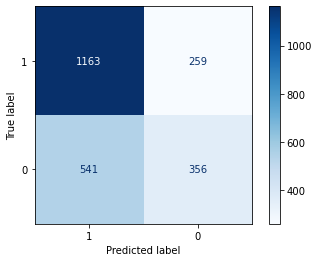

In [66]:
logreg_preds = logreg.predict(X2_test_sc)
logreg_matrix = confusion_matrix(y2_test, logreg_preds)
tn, fp, fn, tp = logreg_matrix.ravel()
plot_confusion_matrix(logreg, X2_test_sc, y2_test, cmap='Blues', 
                      values_format='d', display_labels=[1,0]);

In [35]:
knn = KNeighborsClassifier()
knn.fit(X2_train_sc, y2_train)
knn_train_score = knn.score(X2_train_sc, y2_train)
knn_test_score = knn.score(X2_test_sc, y2_test)
knn_cv_score = cross_val_score(knn, X2_train_sc, y2_train, cv=5).mean()
print(f"Train score: {knn_train_score}")
print(f"Test score: {knn_test_score}")
print(f"CV score: {knn_cv_score}")

Train score: 0.7515813686026452
Test score: 0.6399310047434239
CV score: 0.6213324367650825


/Users/cindy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


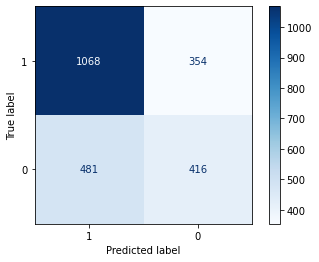

In [67]:
knn_preds = knn.predict(X2_test_sc)
knn_matrix = confusion_matrix(y2_test, knn_preds)
tn2, fp2, fn2, tp2 = knn_matrix.ravel()
plot_confusion_matrix(knn, X2_test_sc, y2_test, cmap='Blues', 
                      values_format='d', display_labels=[1,0]);

In [68]:
accuracy_score(y2_test, knn_preds)

0.6399310047434239

In [69]:
spec = tn2 / (tn2 + fp2)
spec

0.7510548523206751

In [70]:
recall_score(y2_test, knn_preds)

0.463768115942029

In [71]:
precision_score(y2_test, knn_preds)

0.5402597402597402

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X2_train_sc, y2_train)
dt_train_score = dt.score(X2_train_sc, y2_train)
dt_test_score = dt.score(X2_test_sc, y2_test)
dt_cv_score = cross_val_score(dt, X2_train_sc, y2_train, cv=5).mean()
print(f"Train score: {dt_train_score}")
print(f"Test score: {dt_test_score}")
print(f"CV score: {dt_cv_score}")

Train score: 1.0
Test score: 0.5821474773609314
CV score: 0.5977578563342341


In [37]:
bag = BaggingClassifier()
bag.fit(X2_train_sc, y2_train)
bag_train_score = bag.score(X2_train_sc, y2_train)
bag_test_score = bag.score(X2_test_sc, y2_test)
bag_cv_score = cross_val_score(bag, X2_train_sc, y2_train, cv=5).mean()
print(f"Train score: {bag_train_score}")
print(f"Test score: {bag_test_score}")
print(f"CV score: {bag_cv_score}")

Train score: 0.9752731454859115
Test score: 0.6515739542906425
CV score: 0.6473542973301271


In [40]:
rf = RandomForestClassifier()
rf.fit(X2_train_sc, y2_train)
rf_train_score = rf.score(X2_train_sc, y2_train)
rf_test_score = rf.score(X2_test_sc, y2_test)
rf_cv_score = cross_val_score(rf, X2_train_sc, y2_train, cv=5).mean()
print(f"Train score: {rf_train_score}")
print(f"Test score: {rf_test_score}")
print(f"CV score: {rf_cv_score}")

Train score: 1.0
Test score: 0.6670978870202674
CV score: 0.6631680879545849


In [41]:
ada = AdaBoostClassifier()
ada.fit(X2_train_sc, y2_train)
ada_train_score = ada.score(X2_train_sc, y2_train)
ada_test_score = ada.score(X2_test_sc, y2_test)
ada_cv_score = cross_val_score(ada, X2_train_sc, y2_train, cv=5).mean()
print(f"Train score: {ada_train_score}")
print(f"Test score: {ada_test_score}")
print(f"CV score: {ada_cv_score}")

Train score: 0.6927832087406556
Test score: 0.685640362225097
CV score: 0.6795571076790864


In [45]:
svm = SVC()
svm.fit(X2_train_sc, y2_train)
svm_train_score = svm.score(X2_train_sc, y2_train)
svm_test_score = svm.score(X2_test_sc, y2_test)
svm_cv_score = cross_val_score(svm, X2_train_sc, y2_train, cv=5).mean()
print(f"Train score: {svm_train_score}")
print(f"Test score: {svm_test_score}")
print(f"CV score: {svm_cv_score}")

Train score: 0.683870040253019
Test score: 0.6774471755066839
CV score: 0.665324913028748


## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

- false positives: predicted eligible but is not
- false negatives: predicted as not eligible but is

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

minimize false positive. More false negative has lesser risk.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

It is calculated from the precision and recall of the test

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [76]:
logreg_preds_train = logreg.predict(X2_train_sc)
logreg_f1_train = f1_score(y2_train, logreg_preds_train)
print(f'F1 Train: {logreg_f1_train}')

logreg_preds_test = logreg.predict(X2_test_sc)
logreg_f1_test = f1_score(y2_test, logreg_preds_test)
print(f'F1 Test: {logreg_f1_test}')

F1 Train: 0.4822048611111111
F1 Test: 0.4708994708994709


In [77]:
knn_preds_train = knn.predict(X2_train_sc)
knn_f1_train = f1_score(y2_train, knn_preds_train)
print(f'F1 Train: {knn_f1_train}')

knn_preds_test = knn.predict(X2_test_sc)
knn_f1_test = f1_score(y2_test, knn_preds_test)
print(f'F1 Train: {knn_f1_test}')

F1 Train: 0.6587677725118484
F1 Train: 0.49910017996400713


In [79]:
dt_preds_train = dt.predict(X2_train_sc)
dt_f1_train = f1_score(y2_train, dt_preds_train)
print(f'F1 Train: {dt_f1_train}')

dt_preds_test = dt.predict(X2_test_sc)
dt_f1_test = f1_score(y2_test, dt_preds_test)
print(f'F1 Train: {dt_f1_test}')

F1 Train: 1.0
F1 Train: 0.47020229633679606


In [80]:
bag_preds_train = bag.predict(X2_train_sc)
bag_f1_train = f1_score(y2_train, bag_preds_train)
print(f'F1 Train: {bag_f1_train}')

bag_preds_test = bag.predict(X2_test_sc)
bag_f1_test = f1_score(y2_test, bag_preds_test)
print(f'F1 Train: {bag_f1_test}')

F1 Train: 0.9678504672897196
F1 Train: 0.4987593052109181


In [81]:
rf_preds_train = rf.predict(X2_train_sc)
rf_f1_train = f1_score(y2_train, rf_preds_train)
print(f'F1 Train: {rf_f1_train}')

rf_preds_test = rf.predict(X2_test_sc)
rf_f1_test = f1_score(y2_test, rf_preds_test)
print(f'F1 Train: {rf_f1_test}')

F1 Train: 1.0
F1 Train: 0.5326876513317191


In [82]:
ada_preds_train = ada.predict(X2_train_sc)
ada_f1_train = f1_score(y2_train, ada_preds_train)
print(f'F1 Train: {ada_f1_train}')

ada_preds_test = ada.predict(X2_test_sc)
ada_f1_test = f1_score(y2_test, ada_preds_test)
print(f'F1 Train: {ada_f1_test}')

F1 Train: 0.569066344020972
F1 Train: 0.5552165954850519


In [83]:
svm_preds_train = svm.predict(X2_train_sc)
svm_f1_train = f1_score(y2_train, svm_preds_train)
print(f'F1 Train: {svm_f1_train}')

svm_preds_test = svm.predict(X2_test_sc)
svm_f1_test = f1_score(y2_test, svm_preds_test)
print(f'F1 Train: {svm_f1_test}')

F1 Train: 0.4805102763997165
F1 Train: 0.46031746031746035


##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

KNeighborsClassifier, DecisionTreeClassifier, BaggingClassifier, RandomForestClassifier

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

AdaBoostClassifier

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

Grid search for the best param for the following: n_estimators, learning_rate

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.